In [1]:
import utils
import os
from itertools import chain

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

%load_ext autoreload
%autoreload 2

from logistic import LogisticRegression
from patch_manager import ImagePatchManager

import torch

In [2]:
PATCH_SIZE = 16

## Load Data

In [3]:
ROOT_DIR = 'training/'
IMAGE_DIR = ROOT_DIR + 'images/'
files = os.listdir(IMAGE_DIR)

imgs = [utils.load_image(IMAGE_DIR + file) for file in files]

GT_DIR = ROOT_DIR + 'groundtruth/'

gt_imgs = [utils.load_image(GT_DIR + file) for file in files]

## Initialize and feed patch manager

In [4]:
images = ImagePatchManager(imgs, PATCH_SIZE)
gts = ImagePatchManager(gt_imgs, PATCH_SIZE)

In [5]:
x_train = np.array(images.get_p(0, len(images) - 1, map_f=utils.extract_features))
y_train = np.array(gts.get_p(0, len(images) - 1, map_f=utils.patch_to_class))

## Load test image

In [6]:
img = images.get(20)
gt = gts.get(20)
x_test = np.array(images.get_p(20, map_f=utils.extract_features))

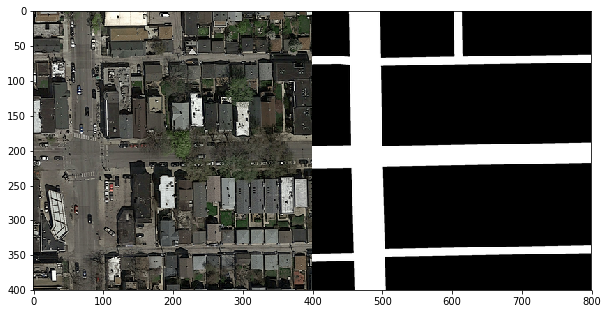

In [7]:
showr = utils.concatenate_images(img, gt)
plt.figure(figsize=(10, 10))
plt.imshow(showr)

## Logistic using pytorch

In [ ]:
m = LogisticRegression(15, 0.0001, max_iter=1000)
m.fit(x_train, y_train)

iter 0 loss: 0.24825890362262726
iter 100 loss: 0.2481715828180313
iter 200 loss: 0.24807778000831604
iter 300 loss: 0.24797073006629944
iter 400 loss: 0.2478739321231842
iter 500 loss: 0.24779264628887177
iter 600 loss: 0.24769918620586395


In [106]:
labs = m.predict(x_test)

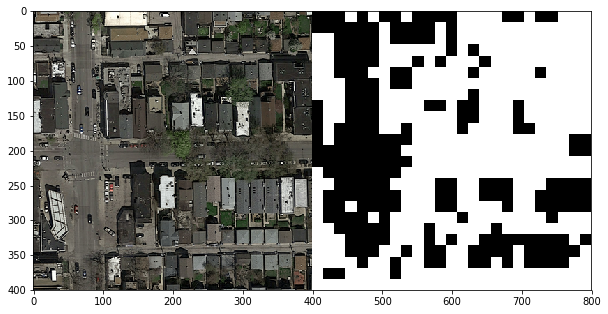

In [107]:
predicted_im = utils.label_to_img(gt.shape[0], gt.shape[1], PATCH_SIZE, PATCH_SIZE, labs)

cimg = utils.concatenate_images(img, predicted_im)
fig1 = plt.figure(figsize=(10, 10))
plt.imshow(cimg, cmap='Greys_r')

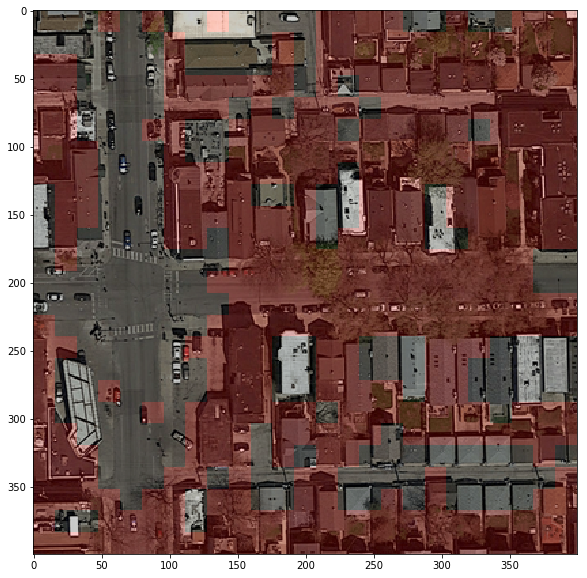

In [108]:
new_img = utils.make_img_overlay(img, predicted_im)
plt.figure(figsize=(10,10))
plt.imshow(new_img)

# ToDo

 - try some convolutions
 - try svm
 - setup cv
 - compute error